# **Description of work:**

Sales analysis is the process of researching data about product sales with the aim of obtaining valuable information and understanding the factors that influence sales volumes. It involves analysis of quantitative and qualitative data, visualizing the results, and identifying key trends and patterns. Sales analysis helps companies make informed business decisions, optimize marketing strategies, manage product assortments, prioritize inventory management, and improve overall sales performance. It enables companies to be more competitive and adaptive to changing market requirements.

During the sales analysis, we will address a number of questions, such as:

* What are the sales patterns based on different time periods (e.g., daily, weekly, monthly)?
* Which products are the most and least popular among customers?
* What factors, such as price, seasonality, and others, have the greatest impact on sales volumes?
* Which products are the most profitable for the company?

### **Main stages of project:**
* Data loading and exploring the data structure with following data preprocessing.
* Exploratory Data Analysis (EDA): Analyzing the dataset, including visualizations and statistical summaries, to gain an understanding of the distribution and relationships between variables.
* Interpretation of research results and summarization: extracting useful information from the study and formulating concise and meaningful conclusions.




In [1]:
import numpy as np                  
import pandas as pd                 
import seaborn as sns               
import matplotlib.pyplot as plt     
import os                           # interact with the operating system  
import phik                         
%matplotlib inline   

plt.style.use('bmh')                # Устанавлием стиль графиков Bayesian Methods for Hackers по умолчанию


In [2]:
# reads multiple CSV files from a directory and combines them into 
# a single DataFrame called all_months_data. 
# Then, it saves this combined data as a CSV file named "all_data.csv". 
# Finally, you load this CSV file into a new DataFrame called df.
files = [file for file in os.listdir('C:/Users/User/Product_sales_data')]

all_months_data = pd.DataFrame()

for file in files:
    data = pd.read_csv("C:/Users/User/Product_sales_data/" + file)
    all_months_data = pd.concat([all_months_data, data]) 
    all_months_data.to_csv("all_data.csv", index=False)                  

df = pd.read_csv('all_data.csv')                                        
df.head(5)                         

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [3]:
# let's explore our new dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [4]:
# revealing proportion of empty fields
df.isna().mean() 

Order ID            0.002917
Product             0.002917
Quantity Ordered    0.002917
Price Each          0.002917
Order Date          0.002917
Purchase Address    0.002917
dtype: float64

In [5]:
df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [6]:
# I'd like to check for false data or outliers
df.query('`Order ID` == "Order ID"') 

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [7]:
# Now I what to make some preprocessing and cleaning operations 
# in order to get rid of the data which was formed
# as a result of concatination of several files.
# I want to include only rows where the 'Order ID' 
# column can be successfully converted to a numeric value
## The errors='coerce' parameter ensures that if any value cannot 
# be converted to numeric, it will be set to NaN (missing value)
# instead of raising an error.
df = df[~pd.to_numeric(df['Order ID'] ,errors='coerce').isna()]
# alternative way
# df = df.dropna(how = 'all')                   # Удаление строк с пустыми значениями
# df = df[df['Order Date'].str[0:2] != 'Or']    # Удаление ложных данных


In [8]:
display(df.isna().mean()) 
df.describe() 

Order ID            0.0
Product             0.0
Quantity Ordered    0.0
Price Each          0.0
Order Date          0.0
Purchase Address    0.0
dtype: float64

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,185950,185950,185950,185950,185950,185950
unique,178437,19,9,23,142395,140787
top,160873,USB-C Charging Cable,1,11.95,12/15/19 20:16,"193 Forest St, San Francisco, CA 94016"
freq,5,21903,168552,21903,8,9


In [9]:
# Data type conversion 
df['Quantity Ordered'], df['Price Each'] = df['Quantity Ordered'].astype('int64'), df['Price Each'].astype('float')    
df['Order Date'] = pd.to_datetime(df['Order Date'])    

In [10]:
df['Year'] = df['Order Date'].dt.year                      

df['Month_Number'] = df['Order Date'].dt.month             

df['Month'] = df['Order Date'].dt.month_name()             

df['Day_Number'] = df['Order Date'].dt.dayofweek           

df['Day'] = df['Order Date'].dt.day_name()                 

df['Hour'] = df['Order Date'].dt.hour                      
    
df['Sales'] = df['Quantity Ordered'] * df['Price Each']    

df['City'] = df['Purchase Address'].apply(lambda x: x.split(',')[1].strip()) 

df['State'] = df['Purchase Address'].str.slice(-8, -6)

# df['Cities'] = df['Purchase Address'].apply(lambda x: x.split(',')[1])                 # Создание столбца с названиями городов

# df['State'] = df['Purchase Address'].apply(lambda x: x.split(',')[2].split(' ')[1])    # Создание столбца с названиями штатов


In [11]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month_Number,Month,Day_Number,Day,Hour,Sales,City,State
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019,4,April,4,Friday,8,23.90,Dallas,TX
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,4,April,6,Sunday,22,99.99,Boston,MA
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,April,4,Friday,14,600.00,Los Angeles,CA
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,April,4,Friday,14,11.99,Los Angeles,CA
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019,4,April,1,Tuesday,9,11.99,Los Angeles,CA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",2019,9,September,1,Tuesday,20,8.97,Los Angeles,CA
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",2019,9,September,6,Sunday,16,700.00,San Francisco,CA
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",2019,9,September,0,Monday,7,700.00,San Francisco,CA
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",2019,9,September,3,Thursday,17,379.99,San Francisco,CA


In [12]:
# Deleting of redundant column
df = df.drop(['Purchase Address'], axis = 1)                

In [13]:
# Let's reveal annual distribution by Order ID
df.groupby('Year')['Order ID'].agg('count')    

Year
2019    185916
2020        34
Name: Order ID, dtype: int64

In [14]:
# So as the data for 2020 year is not representive hence I remove it 
df = df[df['Order Date'].dt.year != 2020]

In [18]:
# Grouping by City and State
df.groupby(['City','State']).agg('count').reset_index()[['City','State']]

,City,State
0,Atlanta,GA
1,Austin,TX
2,Boston,MA
3,Dallas,TX
4,Los Angeles,CA
5,New York City,NY
6,Portland,ME
7,Portland,OR
8,San Francisco,CA
9,Seattle,WA


As we can see above, in two different states there are cities with the same names, let's fix this.

In [19]:
df.loc[df['State'] == 'ME', 'City'] = 'Portland(ME)'    
df.loc[df['State'] == 'OR', 'City'] = 'Portland(OR)'

# Exploratory Data Analysis

In [20]:
df.describe()

,Quantity Ordered,Price Each,Year,Month_Number,Day_Number,Hour,Sales
count,185916.000000,185916.000000,185916.0,185916.000000,185916.000000,185916.000000,185916.000000
mean,1.124368,184.387720,2019.0,7.060248,2.991663,14.415661,185.478203
std,0.442749,332.722426,0.0,3.502358,2.002106,5.421069,332.911130
min,1.000000,2.990000,2019.0,1.000000,0.000000,0.000000,2.990000
25%,1.000000,11.950000,2019.0,4.000000,1.000000,11.000000,11.950000
50%,1.000000,14.950000,2019.0,7.000000,3.000000,15.000000,14.950000
75%,1.000000,150.000000,2019.0,10.000000,5.000000,19.000000,150.000000
max,9.000000,1700.000000,2019.0,12.000000,6.000000,23.000000,3400.000000


interval columns not set, guessing: ['Quantity Ordered', 'Price Each', 'Month_Number', 'Day_Number', 'Hour', 'Sales']


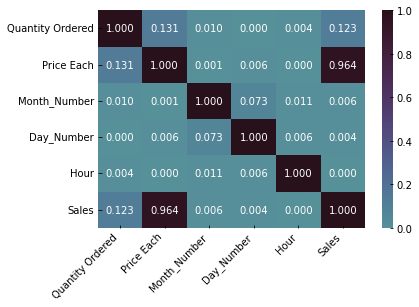

In [21]:
# Removing all inappropriate values from the DataFrame for 
# subsequent calculation of the correlation coefficient matrix 
# for a given dataset.
df_matrix = df.drop(['City','State','Product','Order ID','Month','Year','Day','Order Date'], axis = 1).phik_matrix()

cmap = sns.cubehelix_palette(start=1, rot=-1, dark=0.1, light=0.5, as_cmap=True)    # Создание цветовой палитры
sns.heatmap(df_matrix, annot = True, fmt='.3f', cmap = cmap)                        # Визуализация матрицы корреляции
plt.xticks(rotation = 45, ha = 'right')                                             # Устанавливаем поворот делений оси X
plt.show()                                                                     # Отображение матрицы

In [24]:
def proportion_table(Column: str, rd: int)-> pd.DataFrame:  ###

    """
    Creating a function that takes the following data as input:
     - Column - Parameter that takes a data column for proportion analysis
     - rd - Parameter that assigns number of decimal places after rounding
    """
    df_gr_count = df.groupby(Column)['Order ID'].agg(['count']).reset_index()                          
    df_count = df['Order ID'].agg(['count']).reset_index()                                           
    df_gr_count['proportion'] = (df_gr_count['count'] / df_count['Order ID'].values*100).round(rd)   
    df_gr_count = df_gr_count.sort_values(by = 'proportion', ascending = False)                      
    return display(df_gr_count)      

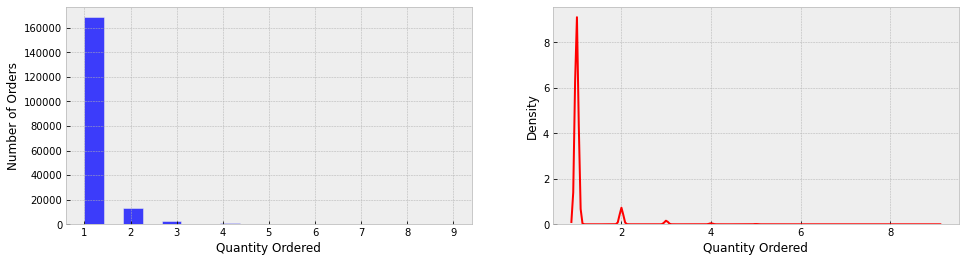

,Quantity Ordered,count,proportion
0,1,168522,90.644
1,2,13322,7.166
2,3,2919,1.570
3,4,805,0.433
4,5,236,0.127
5,6,80,0.043
6,7,24,0.013
7,8,5,0.003
8,9,3,0.002


In [25]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))         

sns.histplot(x = df['Quantity Ordered'], ax = axes[0])              
axes[0].set_xlabel('Quantity Ordered')                              
axes[0].set_ylabel('Number of Orders')                              

sns.kdeplot(df['Quantity Ordered'], ax = axes[1], color = 'red')     
axes[1].set_xlabel('Quantity Ordered')
axes[1].set_ylabel('Density')

plt.show()

proportion_table('Quantity Ordered', 3)                             

As a result, we observe that 90.6% of the items are purchased in single quantity. This is followed by a sharp decrease in the proportion of ordered quantities. Orders for two items account for approximately 7%, while orders for three items make up only 1.5%. Overall, based on the provided data, it can be concluded that the majority of customers prefer to make individual purchases or order small batches of items, while orders for large quantities are extremely rare occurrences.

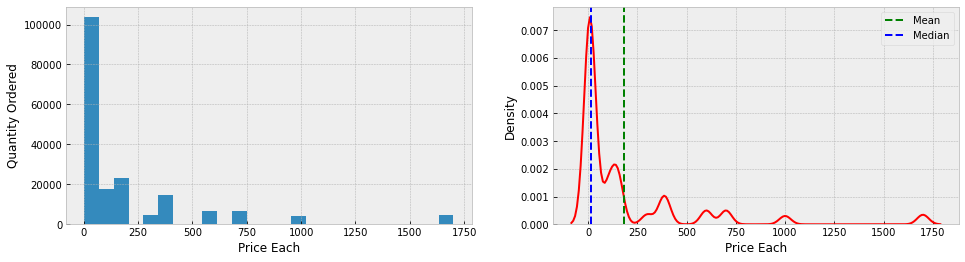

,Price Each,count,proportion
2,11.95,21899,11.78
4,14.95,21653,11.65
0,2.99,20638,11.10
1,3.84,20577,11.07
3,11.99,18881,10.16
8,150.00,15545,8.36
5,99.99,13322,7.17
7,149.99,7504,4.04
13,600.00,6836,3.68
14,700.00,6840,3.68


In [27]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))  

median = df['Price Each'].median()                                    
mean = df['Price Each'].mean()                                          

df['Price Each'].hist(bins = 25, ax = axes[0])                        
axes[0].set_xlabel('Price Each')
axes[0].set_ylabel('Quantity Ordered')  

sns.kdeplot(df['Price Each'], ax = axes[1], color = 'red')
axes[1].set_xlabel('Price Each')
axes[1].set_ylabel('Density')  
axes[1].axvline(mean, color='g', linestyle='--', label='Mean')        
axes[1].axvline(median, color='b', linestyle='--', label='Median')    
axes[1].legend()                                                      
plt.show()

proportion_table('Price Each', 2) 

According to the provided data, we can observe that approximately 55% of the ordered items had prices ranging from 2.99 to 14.95. The presented data allows us to see the distribution of prices for the products and their relative proportion in the total sales volume.

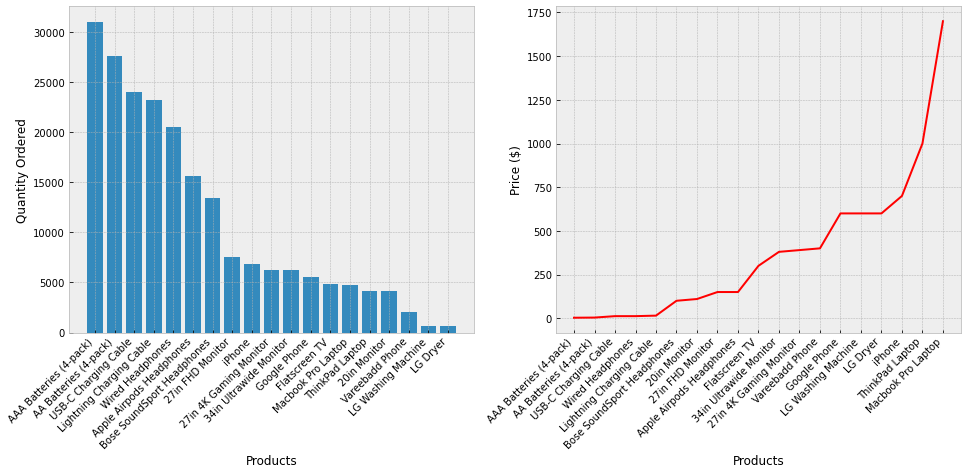

In [28]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))                                       

df_sales = df.groupby('Product')['Quantity Ordered'].agg('sum').sort_values(ascending = False)    
df_prices = df.groupby('Product')['Price Each'].mean().sort_values()                              

axes[0].bar(df_sales.index, df_sales.values)                                                      
axes[0].set_xticks(range(len(df_sales.index)))
axes[0].set_xticklabels(df_sales.index, rotation=45, ha='right')
axes[0].set_xlabel('Products')
axes[0].set_ylabel('Quantity Ordered')
                                                                                
axes[1].plot(df_prices.index, df_prices.values, color='red')
axes[1].set_xticks(range(len(df_sales.index)))
axes[1].set_xticklabels(df_prices.index, rotation=45, ha='right')                                 
axes[1].set_xlabel('Products')
axes[1].set_ylabel('Price ($)')


plt.show()

As seen in the above graph, the lower the price of a product, the more frequently and in greater quantities it is purchased. For example, among the top five best-selling items are batteries, chargers, and headphones, which have relatively lower costs. On the other hand, the least sold items, such as washing machines, smartphones, and laptops, have significantly higher prices accordingly.

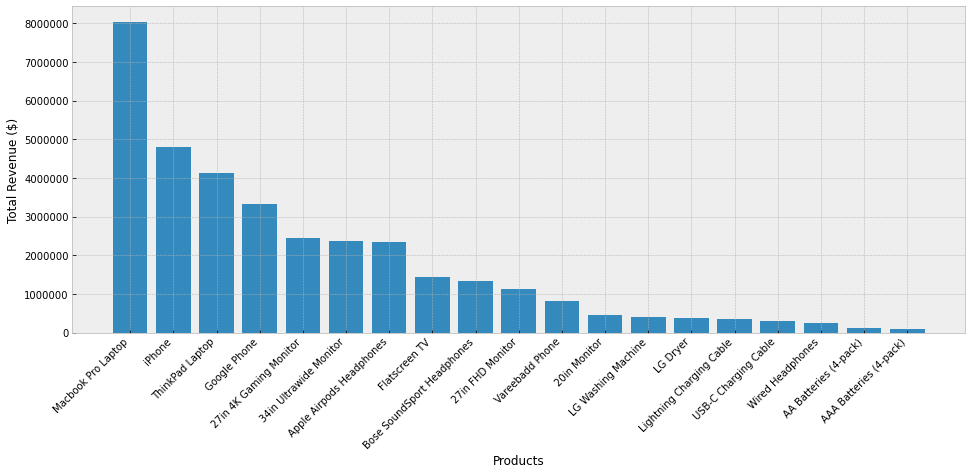

In [30]:
plt.figure(figsize=(16, 6))

df_sales = df.groupby('Product')['Sales'].agg('sum').sort_values(ascending = False)    

plt.bar(df_sales.index, df_sales.values)                                               
plt.xticks(rotation=45, ha = 'right')
plt.ticklabel_format(style='plain', axis='y')                                          
plt.xlabel('Products')
plt.ylabel('Total Revenue ($)')
plt.show()

According to the graph, the most profitable products are smartphones and laptops, while the least profitable ones are batteries, chargers, and headphones. Such significant differences can be attributed to the fact that there is a several-fold disparity in price between these products, whereas the purchase quantities differ only by a few times, as previously determined.

In [ ]:
# Calculating the total revenue for the year
df.groupby('Year')['Sales'].agg(sum)    

Next step will be revealing the most profitable products by means of calculating their proportion for whole dataset.

In [31]:
df_prop = df.groupby('Product')['Sales'].agg(['count','sum']).reset_index()
df_prop['count_proportion'] = ((df_prop['count'] / df['Sales'].count())*100).round(2)    
df_prop['sum_proportion'] = ((df_prop['sum'] / df['Sales'].sum())*100).round(2)
df_prop.sort_values(by = 'sum_proportion', ascending = False)


,Product,count,sum,count_proportion,sum_proportion
13,Macbook Pro Laptop,4723,8035900.00,2.54,23.30
18,iPhone,6840,4792900.00,3.68,13.90
14,ThinkPad Laptop,4126,4127958.72,2.22,11.97
9,Google Phone,5524,3318600.00,2.97,9.62
1,27in 4K Gaming Monitor,6229,2434707.57,3.35,7.06
3,34in Ultrawide Monitor,6181,2355558.01,3.32,6.83
6,Apple Airpods Headphones,15545,2348550.00,8.36,6.81
8,Flatscreen TV,4799,1445400.00,2.58,4.19
7,Bose SoundSport Headphones,13322,1345265.46,7.17,3.90
2,27in FHD Monitor,7504,1131974.53,4.04,3.28


According to the table above we can conclude that top 7 products brings us 80% of total revenue whereas their share of sales equals - 26,5%.

In [32]:
# Here we are figuring out which combinations of products were purchased the most
from itertools import combinations    
from collections import Counter       

df_dupl = df[df['Order ID'].duplicated(keep=False)]             
df_dupl = df_dupl[['Order ID','Product']]                       

df_dupl['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))    

df_dupl = df_dupl[['Order ID', 'Grouped']].drop_duplicates()    

count = Counter()                                               
for row in df_dupl['Grouped']:                                  
    row_list = row.split(',')                           
    count.update(Counter(combinations(row_list, 2)))    
for key, value in count.most_common(10):                        
    print(key, value)
   

('iPhone', 'Lightning Charging Cable') 1004
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 359
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


According to the list above most commonly chargers and headphones are ordered together with smartphones. This information can help in configuring advertising campaigns when purchasing a particular product to increase the average purchase value per paying user

In [33]:
# 
def barplot_date_func(Column_Sort: str, Column: str, size_w: int, size_l: int):

    """
    Creating a function that takes the following data as input:
     - Column_Sort - Parameter that takes a data column for sorting
     - Column - Parameter that takes a column of data for building a diagram
     - size_w - Parameter that determines the width of the graph
     - size_l - Parameter that determines the lenth of the graph.
    """
    df_sort_sales = df.sort_values(by = Column_Sort).groupby([Column_Sort,Column])['Sales'].agg('sum').reset_index()

    plt.figure(figsize=(size_w, size_l))
    sns.barplot(x=df_sort_sales[Column], y=df_sort_sales['Sales'])    
    plt.xlabel(Column)
    plt.ylabel('Sales ($)')
    plt.ticklabel_format(style='plain', axis='y')
    plt.show()
    return display(df_sort_sales)           

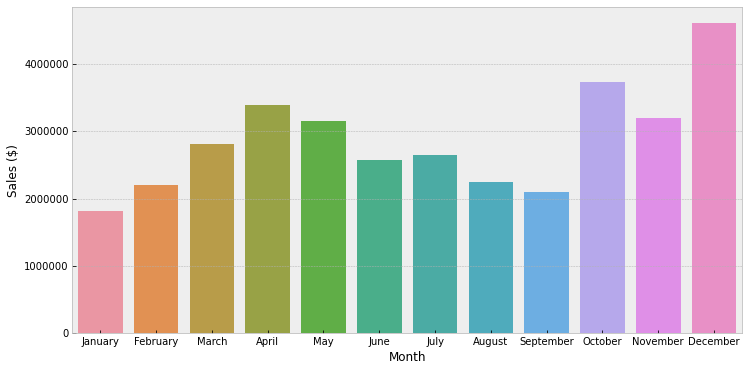

,Month_Number,Month,Sales
0,1,January,1813586.44
1,2,February,2202022.42
2,3,March,2807100.38
3,4,April,3390670.24
4,5,May,3152606.75
5,6,June,2577802.26
6,7,July,2647775.76
7,8,August,2244467.88
8,9,September,2097560.13
9,10,October,3736726.88


In [34]:
barplot_date_func('Month_Number', 'Month', 12, 6)

The data indicates a clear seasonal pattern in the total revenue. December stands out as the most profitable month, and there are several possible reasons for this:

* Presence of holidays such as Christmas and New Year
* Discounts and sales events
* Bonuses and annual rewards


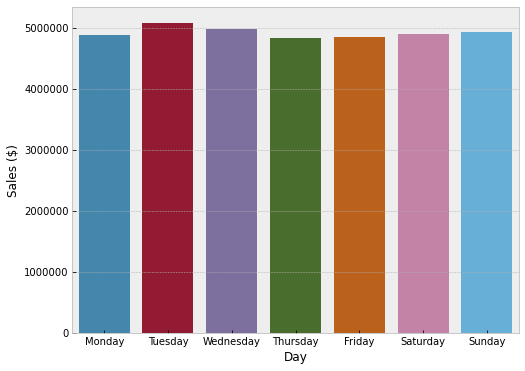

,Day_Number,Day,Sales
0,0,Monday,4883326.72
1,1,Tuesday,5087956.78
2,2,Wednesday,4980151.97
3,3,Thursday,4839465.16
4,4,Friday,4855938.38
5,5,Saturday,4904357.01
6,6,Sunday,4932169.66


In [35]:
barplot_date_func('Day_Number', 'Day', 8, 6)

Throughout the week, the overall sales volume remains relatively stable. The difference between the highest and lowest revenue values is insignificant. There is no clear trend in the variation of total revenue over the course of the week.

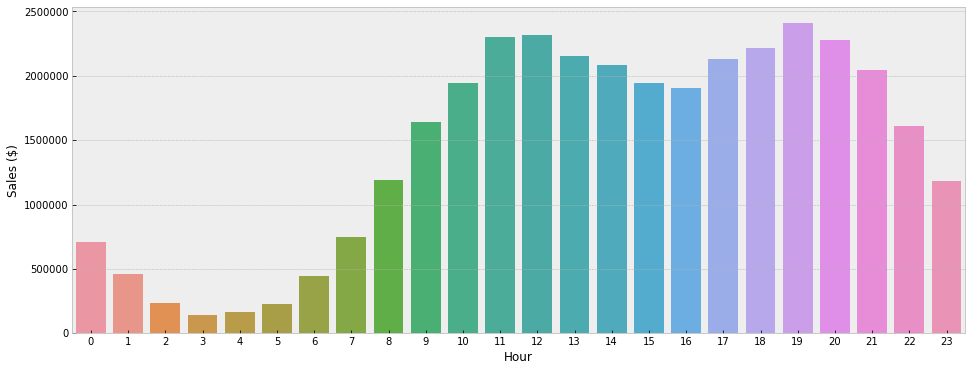

In [36]:
df_hour_sort_sales = df.sort_values(by = 'Hour').groupby(['Hour'])['Sales'].agg('sum').reset_index()   # Создание диаграммы продаж по часам
plt.figure(figsize=(16, 6))
sns.barplot(x=df_hour_sort_sales['Hour'], y=df_hour_sort_sales['Sales'])
plt.xlabel('Hour')
plt.ylabel('Sales ($)')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

  Based on the provided data, the following observations can be made:

* There is a significant increase in revenue during the morning and daytime hours (from 6:00 to 13:00). During this time, customers may be making purchases before their workday or while commuting.
* Evening hours (from 18:00 to 22:00) show the highest revenue figures. This could be due to people making more purchases during their leisure time, which drives up demand.

In [37]:
def barplot_loc_func(Column: str, size_w: int, size_l: int, rot: int, ha: str):

    """
    Creating a function that takes the following data as input:
     - Column - Parameter that takes a column of data for building a diagram
     - size_w - Parameter that determines the width of the graph
     - size_l - Parameter that determines the lenth of the graph
     - rot - Parameter that determines the label rotation
     - ha - Parameter for horizontal alignment of values
    """
    df_sales = df.groupby([Column])['Sales'].agg('sum').reset_index()
    df_sales = df_sales.sort_values(by = 'Sales', ascending = False)
    plt.figure(figsize=(size_w, size_l))
    sns.barplot(x=df_sales[Column], y=df_sales['Sales'])    # Создание диаграммы по продажам
    plt.xlabel(Column)
    plt.ylabel('Sales ($)')
    plt.xticks(rotation=rot, ha = ha)
    plt.ticklabel_format(style='plain', axis='y')
    plt.show() 
    return display(df_sales)         

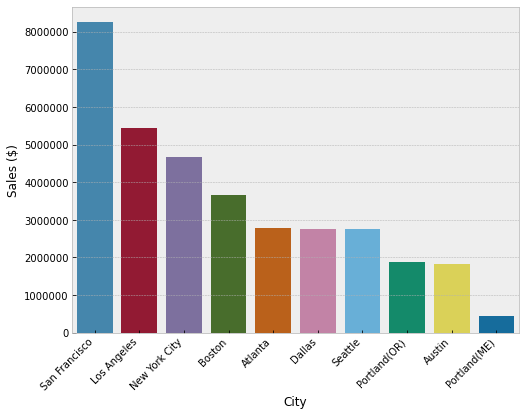

,City,Sales
8,San Francisco,8259719.03
4,Los Angeles,5451570.81
5,New York City,4662976.81
2,Boston,3660315.12
0,Atlanta,2795498.58
3,Dallas,2766260.45
9,Seattle,2747605.49
7,Portland(OR),1870579.35
1,Austin,1819081.77
6,Portland(ME),449758.27


In [38]:
barplot_loc_func('City', 8, 6, 45, 'right')

San Francisco significantly outperforms other cities on the sales volume list. This city generates the highest total revenue, reaching a value of $8,259,719.

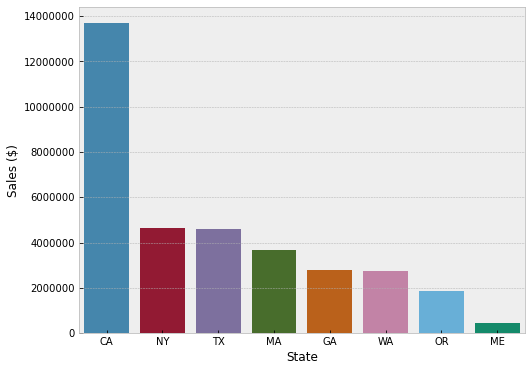

,State,Sales
0,CA,13711289.84
4,NY,4662976.81
6,TX,4585342.22
2,MA,3660315.12
1,GA,2795498.58
7,WA,2747605.49
5,OR,1870579.35
3,ME,449758.27


In [39]:
barplot_loc_func('State', 8, 6, 0, 'center')

California (CA) has the highest level of revenue among all the states on the list. This state includes two of the most profitable cities, San Francisco and Los Angeles.

# Interpreting the results of a study and summarizing the findings:




During the study, the following findings were identified:

Customer preferences:
* The majority of customers prefer to make individual purchases or order small quantities of goods, as 90.6% of the products were purchased in single units. There is a sharp decrease in the proportion of orders when two or more units are ordered. Consequently, it can be concluded that orders for large quantities of goods are rare occurrences.

Distribution of prices for products:
* Approximately 55% of the ordered products had prices ranging from 2.99 to 14.95 dollars. This indicates that the majority of customers prefer products with relatively low costs.
* The best-selling items, such as batteries, chargers, and headphones, have a low cost. On the other hand, high-priced items like smartphones and laptops are sold significantly less frequently.

Profitability of products:
* Smartphones and laptops are the most profitable products, while batteries, chargers, and headphones are the least profitable. The 'Macbook Pro Laptop' generated the highest revenue among all laptops, amounting to 8,035,900 dollars, while among smartphones, the 'iPhone' generated 4,792,900 dollars in revenue.

Seasonality of revenue:
* The total revenue for the year amounts to 34,483,365 dollars.
* December is the most profitable month with revenue of 4,613,443 dollars. Throughout the year, noticeable changes occur in the revenue volume, which can be attributed to various events such as holidays, technological trends, promotions, and sales.
* There is a significant variation in sales volume throughout the day. Revenue tends to increase in the morning and during the lunchtime hours (from 6:00 AM to 1:00 PM). The highest revenue values are observed in the evening (from 6:00 PM to 10:00 PM). This can be attributed to the fact that people have more free time after their workday ends and show a greater interest in making purchases during this period.

Location analysis:
* Based on the conducted data analysis, it can be concluded that the city of San Francisco is the leader with the highest total revenue of 8,259,719 dollars. Additionally, the state of California (CA), which includes cities like San Francisco and Los Angeles, has the highest level of revenue among all states. These findings underscore the importance of considering location in analyzing and planning marketing strategies and resource allocation to maximize profitability.